In [2]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pitching_path = 'baseball_pitching/data/'
hitting_path = 'baseball_hitting/data/'

# Data Exploration, Merging data

In [4]:
poi = pd.read_csv(pitching_path + 'poi/poi_metrics.csv')

In [5]:
metadata = pd.read_csv(pitching_path + 'metadata.csv')

In [6]:
poi.columns

Index(['session_pitch', 'session', 'p_throws', 'pitch_type', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp', 'elbow_pronation_fp',
       'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_

In [7]:
metadata.columns

Index(['user', 'session', 'session_pitch', 'session_mass_kg',
       'session_height_m', 'age_yrs', 'playing_level', 'pitch_speed_mph',
       'filename_new', 'modelname_new'],
      dtype='object')

In [8]:
metadata.drop(columns=['user', 'session', 'pitch_speed_mph', 'filename_new', 'modelname_new'], axis=1, inplace=True)

In [9]:
poi_metadata = poi.merge(metadata, on='session_pitch', how='left')
poi_metadata

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620,110.6784,1.9304,21.40,college
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636,110.6784,1.9304,21.40,college
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333,101.1528,1.9304,19.41,college
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727,101.1528,1.9304,19.41,college
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719,101.1528,1.9304,19.41,college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,3252,R,FF,80.8,4494.0446,2759.7142,1129.4168,42.9000,123.5448,...,141.5886,1685.4288,1891.2377,63.0494,6307.8100,72742.9029,88.4520,1.8796,20.38,college
407,3252_2,3252,R,FF,80.8,4550.4618,2742.8536,1129.4417,43.5008,123.5490,...,104.1382,1708.8564,1932.4776,61.7749,7850.2644,77906.1103,88.4520,1.8796,20.38,college
408,3252_3,3252,R,FF,80.8,4580.0385,2796.3719,1133.8676,43.7838,125.6560,...,86.2704,1647.5457,1858.1106,62.8667,16303.1697,77777.3331,88.4520,1.8796,20.38,college
409,3252_4,3252,R,FF,83.3,4638.4414,2815.9331,1119.5235,43.0352,127.5534,...,117.9198,1658.6645,1863.5780,63.3718,11758.9779,77382.0300,88.4520,1.8796,20.38,college


In [10]:
poi_metadata.p_throws = np.where(poi_metadata.p_throws == 'R', 1, 0)

In [11]:
level_encoding = {
    'high_school': 1,
    'college': 2,
    'independent': 3,
    'milb': 4
}
poi_metadata['playing_level'] = poi_metadata['playing_level'].replace(level_encoding)

In [12]:
poi_metadata.drop('pitch_type', axis=1, inplace=True)

In [13]:
poi_metadata.drop('session', axis=1, inplace=True)

<Axes: >

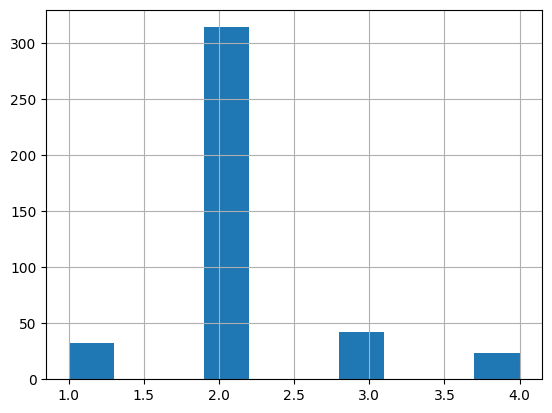

In [14]:
poi_metadata.playing_level.hist()

<Axes: >

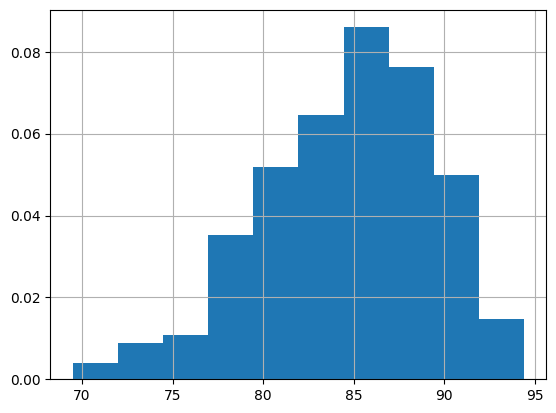

In [15]:
poi_metadata.pitch_speed_mph.hist(density=True)    

In [16]:
print(np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==1]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==2]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==3]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==4]))

79.515625 84.73375796178344 85.94285714285715 89.24782608695651


In [17]:
pitching_full_sig_path = pitching_path + 'full_sig/'
energy_flow = pd.read_csv(pitching_full_sig_path + 'energy_flow.csv')
force_plate = pd.read_csv(pitching_full_sig_path + 'force_plate.csv')
forces_moments = pd.read_csv(pitching_full_sig_path + 'forces_moments.csv')
joint_angles = pd.read_csv(pitching_full_sig_path + 'joint_angles.csv')
joint_velos = pd.read_csv(pitching_full_sig_path + 'joint_velos.csv')
landmarks = pd.read_csv(pitching_full_sig_path + 'landmarks.csv')

In [18]:
energy_flow.columns

Index(['session_pitch', 'time', 'rear_knee_energy_transfer_stp',
       'rear_knee_energy_transfer_jfp', 'rear_knee_energy_generated',
       'lead_knee_energy_transfer_stp', 'lead_knee_energy_transfer_jfp',
       'lead_knee_energy_generated', 'rear_hip_energy_transfer_stp',
       'rear_hip_energy_transfer_jfp', 'rear_hip_energy_generated',
       'lead_hip_energy_transfer_stp', 'lead_hip_energy_transfer_jfp',
       'lead_hip_energy_generated', 'elbow_energy_transfer_stp',
       'elbow_energy_transfer_jfp', 'elbow_energy_generated',
       'glove_elbow_energy_transfer_stp', 'glove_elbow_energy_transfer_jfp',
       'glove_elbow_energy_generated', 'shoulder_energy_transfer_stp',
       'shoulder_energy_transfer_jfp', 'shoulder_energy_generated',
       'glove_shoulder_energy_transfer_stp',
       'glove_shoulder_energy_transfer_jfp', 'glove_shoulder_energy_generated',
       'glove_upper_arm_dist_seg_pwr', 'glove_upper_arm_prox_seg_pwr',
       'glove_forearm_dist_seg_pwr', 'glove_f

In [19]:
force_plate.columns

Index(['session_pitch', 'time', 'rear_force_x', 'rear_force_y', 'rear_force_z',
       'lead_force_x', 'lead_force_y', 'lead_force_z', 'pkh_time',
       'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object')

In [20]:
forces_moments.columns

Index(['session_pitch', 'time', 'rear_ankle_moment_x', 'rear_ankle_moment_y',
       'rear_ankle_moment_z', 'elbow_moment_x', 'elbow_moment_y',
       'elbow_moment_z', 'rear_hip_rear_thigh_moment_x',
       'rear_hip_rear_thigh_moment_y',
       ...
       'glove_shoulder_thorax_force_z', 'glove_wrist_force_x',
       'glove_wrist_force_y', 'glove_wrist_force_z', 'pkh_time', 'fp_10_time',
       'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object', length=104)

In [21]:
joint_angles.columns

Index(['session_pitch', 'time', 'rear_ankle_angle_x', 'rear_ankle_angle_y',
       'rear_ankle_angle_z', 'elbow_angle_x', 'elbow_angle_y', 'elbow_angle_z',
       'rear_hip_angle_x', 'rear_hip_angle_y', 'rear_hip_angle_z',
       'rear_knee_angle_x', 'rear_knee_angle_y', 'rear_knee_angle_z',
       'shoulder_angle_x', 'shoulder_angle_y', 'shoulder_angle_z',
       'wrist_angle_x', 'wrist_angle_y', 'wrist_angle_z', 'pelvis_angle_x',
       'pelvis_angle_y', 'pelvis_angle_z', 'lead_ankle_angle_x',
       'lead_ankle_angle_y', 'lead_ankle_angle_z', 'glove_elbow_angle_x',
       'glove_elbow_angle_y', 'glove_elbow_angle_z', 'lead_hip_angle_x',
       'lead_hip_angle_y', 'lead_hip_angle_z', 'lead_knee_angle_x',
       'lead_knee_angle_y', 'lead_knee_angle_z', 'glove_shoulder_angle_x',
       'glove_shoulder_angle_y', 'glove_shoulder_angle_z',
       'glove_wrist_angle_x', 'glove_wrist_angle_y', 'glove_wrist_angle_z',
       'torso_angle_x', 'torso_angle_y', 'torso_angle_z',
       'torso_pe

In [22]:
joint_velos.columns

Index(['session_pitch', 'time', 'elbow_velo_x', 'elbow_velo_y', 'elbow_velo_z',
       'rear_hip_velo_x', 'rear_hip_velo_y', 'rear_hip_velo_z',
       'rear_knee_velo_x', 'rear_knee_velo_y', 'rear_knee_velo_z',
       'shoulder_velo_x', 'shoulder_velo_y', 'shoulder_velo_z', 'wrist_velo_x',
       'wrist_velo_y', 'wrist_velo_z', 'pelvis_velo_x', 'pelvis_velo_y',
       'pelvis_velo_z', 'glove_elbow_velo_x', 'glove_elbow_velo_y',
       'glove_elbow_velo_z', 'lead_hip_velo_x', 'lead_hip_velo_y',
       'lead_hip_velo_z', 'lead_knee_velo_x', 'lead_knee_velo_y',
       'lead_knee_velo_z', 'glove_shoulder_velo_x', 'glove_shoulder_velo_y',
       'glove_shoulder_velo_z', 'glove_wrist_velo_x', 'glove_wrist_velo_y',
       'glove_wrist_velo_z', 'torso_velo_x', 'torso_velo_y', 'torso_velo_z',
       'torso_pelvis_velo_x', 'torso_pelvis_velo_y', 'torso_pelvis_velo_z',
       'pkh_time', 'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time',
       'MIR_time'],
      dtype='object')

In [23]:
landmarks.columns

Index(['session_pitch', 'time', 'rear_ankle_jc_x', 'rear_ankle_jc_y',
       'rear_ankle_jc_z', 'rear_hip_x', 'rear_hip_y', 'rear_hip_z',
       'elbow_jc_x', 'elbow_jc_y', 'elbow_jc_z', 'hand_jc_x', 'hand_jc_y',
       'hand_jc_z', 'rear_knee_jc_x', 'rear_knee_jc_y', 'rear_knee_jc_z',
       'shoulder_jc_x', 'shoulder_jc_y', 'shoulder_jc_z', 'wrist_jc_x',
       'wrist_jc_y', 'wrist_jc_z', 'lead_ankle_jc_x', 'lead_ankle_jc_y',
       'lead_ankle_jc_z', 'lead_hip_x', 'lead_hip_y', 'lead_hip_z',
       'glove_elbow_jc_x', 'glove_elbow_jc_y', 'glove_elbow_jc_z',
       'glove_hand_jc_x', 'glove_hand_jc_y', 'glove_hand_jc_z',
       'lead_knee_jc_x', 'lead_knee_jc_y', 'lead_knee_jc_z',
       'glove_shoulder_jc_x', 'glove_shoulder_jc_y', 'glove_shoulder_jc_z',
       'glove_wrist_jc_x', 'glove_wrist_jc_y', 'glove_wrist_jc_z',
       'thorax_ap_x', 'thorax_ap_y', 'thorax_ap_z', 'thorax_dist_x',
       'thorax_dist_y', 'thorax_dist_z', 'thorax_prox_x', 'thorax_prox_y',
       'thorax_prox_z

In [24]:
print(len(poi_metadata),len(energy_flow),len(force_plate),len(forces_moments),len(joint_angles),len(joint_velos),len(landmarks))

411 247709 727824 247709 247709 247709 247709


In [25]:
columns = []
for col in force_plate.columns:
    if col in energy_flow.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = energy_flow.merge(force_plate.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [26]:
columns = []
for col in forces_moments.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(forces_moments.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [27]:
columns = []
for col in joint_angles.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_angles.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [28]:
columns = []
for col in joint_velos.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_velos.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [29]:
columns = []
for col in landmarks.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(landmarks.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [30]:
merged

,session_pitch,time,rear_knee_energy_transfer_stp,rear_knee_energy_transfer_jfp,rear_knee_energy_generated,lead_knee_energy_transfer_stp,lead_knee_energy_transfer_jfp,lead_knee_energy_generated,rear_hip_energy_transfer_stp,rear_hip_energy_transfer_jfp,...,thorax_ap_z,thorax_dist_x,thorax_dist_y,thorax_dist_z,thorax_prox_x,thorax_prox_y,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z
0,1031_2,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6123,0.1213,-0.1545,1.3509,0.1147,-0.1729,1.6184,0.1148,-0.1556,1.1440
1,1031_2,0.0028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6124,0.1218,-0.1547,1.3510,0.1152,-0.1731,1.6184,0.1167,-0.1562,1.1458
2,1031_2,0.0056,45.3350,20.1973,-8.0818,17.7538,6.0121,44.9851,0.1649,19.1142,...,1.6125,0.1221,-0.1549,1.3511,0.1156,-0.1733,1.6184,0.1169,-0.1563,1.1459
3,1031_2,0.0083,38.2959,19.3669,-8.7513,14.0252,4.4715,34.3861,0.0000,18.4929,...,1.6126,0.1224,-0.1551,1.3512,0.1160,-0.1736,1.6185,0.1171,-0.1564,1.1459
4,1031_2,0.0111,31.5861,18.5402,-9.5193,10.4432,3.0432,24.3333,0.0000,17.8197,...,1.6127,0.1227,-0.1553,1.3512,0.1163,-0.1738,1.6186,0.1173,-0.1566,1.1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,-65.5371,-174.4923,10.9729,-101.9002,25.9129,-321.7640,0.0000,-284.1946,...,1.2854,1.5113,-0.0011,1.1167,1.6018,0.1272,1.2994,1.4461,-0.0296,0.9630
247705,3252_5,1.7556,-57.7275,-163.6167,9.1722,-101.9734,26.6900,-320.3218,0.0000,-277.5526,...,1.2879,1.5129,0.0010,1.1187,1.6033,0.1291,1.3020,1.4480,-0.0290,0.9657
247706,3252_5,1.7583,-53.0746,-157.1646,8.0998,-102.0185,27.1232,-319.4924,0.0000,-273.6412,...,1.2901,1.5144,0.0030,1.1206,1.6048,0.1308,1.3044,1.4500,-0.0285,0.9682
247707,3252_5,1.7611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2920,1.5159,0.0049,1.1222,1.6063,0.1323,1.3065,1.4520,-0.0279,0.9703


In [31]:
for col in merged.columns:
    if col in poi_metadata.columns:
        print(col)

session_pitch


In [32]:
all_merged = poi_metadata.merge(merged.drop(columns=columns, axis=1), on = 'session_pitch', how='left')

In [33]:
all_merged['order'] = all_merged.groupby('session_pitch').cumcount() + 1
all_merged.order

0           1
1           2
2           3
3           4
4           5
         ... 
247704    632
247705    633
247706    634
247707    635
247708    636
Name: order, Length: 247709, dtype: int64

In [34]:
poi_metadata[poi_metadata.isna().any(axis=1)]

,session_pitch,p_throws,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation,elbow_flexion_fp,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
15,1370_1,1,87.8,4378.9195,2233.9898,1152.4505,28.4991,106.6919,156.3049,95.9804,...,NaN,NaN,NaN,NaN,NaN,NaN,104.3280,1.9050,23.43,3
191,2857_4,1,72.9,4815.1804,2386.8824,877.5712,40.6763,96.2136,165.2810,52.6094,...,NaN,NaN,NaN,NaN,NaN,NaN,69.4008,1.8542,18.85,2
247,2919_2,1,82.6,4924.3223,2775.5162,951.6221,28.8214,132.7934,182.2818,90.9193,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
248,2919_3,1,84.0,4812.6796,2720.4570,985.4787,29.6014,134.5015,184.0617,93.9795,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
249,2919_4,1,82.6,4847.2724,2766.5142,954.6934,28.7634,134.0515,183.6061,92.7248,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
250,2919_5,1,82.6,4991.7229,2821.7158,953.1706,28.0776,132.8751,184.1284,93.9730,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
251,2923_1,1,78.9,4250.3573,2077.3878,1062.1852,21.4589,101.8802,151.2197,91.0276,...,NaN,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2
252,2923_2,1,76.4,4292.0506,2071.5214,1088.3251,22.0308,100.8572,152.0982,91.2621,...,NaN,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2


In [35]:
poi_metadata.dropna(inplace=True)

# POI Metadata

Train-test split

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [346]:
poi_train, poi_test, mph_train, mph_test = train_test_split(poi_metadata.drop(columns=['pitch_speed_mph']), poi_metadata.pitch_speed_mph, test_size=0.2, random_state=42)
poi_train, poi_val, mph_train, mph_val = train_test_split(poi_train, mph_train, test_size=0.2, random_state=42)

In [347]:
poi_train = poi_train.reset_index().drop(columns='index', axis=1)
poi_val = poi_val.reset_index().drop(columns='index', axis=1)
mph_train = mph_train.reset_index().drop(columns='index', axis=1)
mph_val = mph_val.reset_index().drop(columns='index', axis=1)
poi_test = poi_test.reset_index().drop(columns='index', axis=1)
mph_test = mph_test.reset_index().drop(columns='index', axis=1)

In [348]:
x_train = poi_train.drop(columns=['session_pitch'])
x_val = poi_val.drop(columns=['session_pitch'])

linear_model = LinearRegression().fit(x_train,mph_train)
print('R^2: ' + str(linear_model.score(x_val,mph_val)))
predictions = linear_model.predict(x_val)
print('RMSE: ' + str(np.sqrt(mean_squared_error(mph_val, predictions))))

R^2: 0.6580810469227608
RMSE: 2.6862724926278787


In [349]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8425873633889961
RMSE: 1.8226709595016277


XGBoost is wayyyyy better

In [350]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)
x_val_standardized = scaler.transform(x_val)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train_standardized, mph_train)

r_squared = linear_model.score(x_val_standardized, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val_standardized)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8425873633889961
RMSE: 1.8226709595016277


Standardizing makes literally no difference in performance, and it will hinder interpretability, so we will not do this.

In [351]:
landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
0,1031_2,0.0000,0.0719,-0.1806,0.0622,-0.0345,-0.1740,0.9830,-0.1766,-0.2383,...,1.6184,0.1148,-0.1556,1.1440,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
1,1031_2,0.0028,0.0720,-0.1806,0.0623,-0.0343,-0.1738,0.9832,-0.1764,-0.2382,...,1.6184,0.1167,-0.1562,1.1458,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
2,1031_2,0.0056,0.0719,-0.1806,0.0624,-0.0342,-0.1736,0.9833,-0.1762,-0.2380,...,1.6184,0.1169,-0.1563,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
3,1031_2,0.0083,0.0719,-0.1806,0.0624,-0.0341,-0.1734,0.9835,-0.1762,-0.2378,...,1.6185,0.1171,-0.1564,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
4,1031_2,0.0111,0.0718,-0.1805,0.0624,-0.0341,-0.1732,0.9836,-0.1762,-0.2377,...,1.6186,0.1173,-0.1566,1.1460,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,0.7124,-0.4337,0.7062,1.4425,-0.2609,0.8528,1.4963,0.1718,...,1.2994,1.4461,-0.0296,0.9630,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247705,3252_5,1.7556,0.7193,-0.4447,0.7169,1.4456,-0.2594,0.8554,1.4979,0.1699,...,1.3020,1.4480,-0.0290,0.9657,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247706,3252_5,1.7583,0.7261,-0.4550,0.7268,1.4485,-0.2579,0.8577,1.4998,0.1686,...,1.3044,1.4500,-0.0285,0.9682,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247707,3252_5,1.7611,0.7325,-0.4643,0.7359,1.4514,-0.2565,0.8598,1.5018,0.1677,...,1.3065,1.4520,-0.0279,0.9703,0.800,1.4139,1.4278,1.5500,1.5778,1.6139


In [574]:
max_time_per_session = all_merged.groupby('session_pitch')['time'].max().reset_index()
idx = landmarks.groupby('session_pitch')['lead_knee_jc_z'].idxmax()
peak_leg_lift_time = landmarks.loc[idx, ['session_pitch', 'lead_knee_jc_z', 'time']].rename(columns={'time': 'peak_knee_time', 'lead_knee_jc_z': 'max_lead_knee_jc_z'}).reset_index(drop=True)
BR_FP_time = landmarks.groupby('session_pitch')[['BR_time', 'fp_10_time', 'fp_100_time']].max().reset_index()
timing_df = peak_leg_lift_time.merge(BR_FP_time, on='session_pitch', how='inner')
timing_df['peak_knee_to_BR_time'] = timing_df.BR_time - timing_df.peak_knee_time
timing_df['peak_knee_to_FS_time'] = timing_df.fp_10_time - timing_df.peak_knee_time
timing_df['peak_knee_to_FP_time'] = timing_df.fp_100_time - timing_df.peak_knee_time
timing_df['FS_to_BR_time'] = timing_df.BR_time - timing_df.fp_10_time
timing_df['FP_to_BR_time'] = timing_df.BR_time - timing_df.fp_100_time
timing_df = timing_df.merge(max_time_per_session, on='session_pitch', how='left').rename(columns={'time': 'total_time'})

timing_df

,session_pitch,max_lead_knee_jc_z,peak_knee_time,BR_time,fp_10_time,fp_100_time,peak_knee_to_BR_time,peak_knee_to_FS_time,peak_knee_to_FP_time,FS_to_BR_time,FP_to_BR_time,total_time
0,1031_2,1.1610,0.6250,1.3389,1.1806,1.1917,0.7139,0.5556,0.5667,0.1583,0.1472,1.5250
1,1031_3,1.1455,0.0917,0.8250,0.6639,0.6806,0.7333,0.5722,0.5889,0.1611,0.1444,1.0167
2,1097_1,1.2528,0.1056,1.0028,0.7722,0.8278,0.8972,0.6666,0.7222,0.2306,0.1750,1.1944
3,1097_2,1.3346,0.1722,1.0611,0.8528,0.8917,0.8889,0.6806,0.7195,0.2083,0.1694,1.2361
4,1097_3,1.3434,0.1472,1.0306,0.8361,0.8472,0.8834,0.6889,0.7000,0.1945,0.1834,1.2361
...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,1.1282,1.1250,1.9167,1.7556,1.7722,0.7917,0.6306,0.6472,0.1611,0.1445,2.0722
407,3252_2,1.1912,0.8583,1.6722,1.5111,1.5250,0.8139,0.6528,0.6667,0.1611,0.1472,1.8139
408,3252_3,1.1596,0.8944,1.6889,1.5306,1.5444,0.7945,0.6362,0.6500,0.1583,0.1445,1.8778
409,3252_4,1.1912,0.6250,1.4444,1.2861,1.3083,0.8194,0.6611,0.6833,0.1583,0.1361,1.6500


In [353]:
# Merge this information back into poi_metadata
poi_train_new = pd.merge(poi_train, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')
poi_val_new = pd.merge(poi_val, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')

In [354]:
x_train = poi_train_new.drop(columns=['session_pitch'])
x_val = poi_val_new.drop(columns=['session_pitch'])
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8662908857844067
RMSE: 1.6798441190256137


In [355]:
from scipy import stats
import statsmodels.api as sm

In [356]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
48,elbow_transfer_fp_br,0.308532
64,thorax_distal_transfer_fp_br,0.109984
22,max_cog_velo_x,0.097361
78,session_height_m,0.053416
80,playing_level,0.045910
...,...,...
18,torso_rotation_fp,0.000028
54,lead_knee_transfer_fp_br,0.000026
15,lead_knee_extension_angular_velo_max,0.000003
76,peak_rfd_lead,0.000003


In [357]:
model = sm.OLS(mph_train, x_train)
result = model.fit()

In [358]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9363.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                   8.32e-281
Time:                        20:41:13   Log-Likelihood:                         -419.22
No. Observations:                 257   AIC:                                      1010.
Df Residuals:                     171   BIC:                                      1316.
Df Model:                          86                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
p_throws                                     -1.7065      0.576     -2.962      0.003      -2.844      -0.569
max_shoulder_internal_rotational_velo        -0.0004      0.001     -0.604      0.546      -0.002       0.001
max_elbow_extension_velo                      0.0028      0.002      1.791      0.075      -0.000       0.006
max_torso_rotational_velo                     0.0253      0.004      6.678      0.000       0.018       0.033
max_rotation_hip_shoulder_separation         -0.0714      0.089     -0.800      0.425      -0.248       0.105
max_elbow_flexion                             0.1551      0.046      3.349      0.001       0.064       0.246
max_shoulder_external_rotation                0.0686      0.029      2.373      0.019       0.012       0.126
elbow_flexion_fp                             -0.0353      0.024     -1.442      0.151      -0.084       0.013
elbow_pronation_fp                           -0.0009      0.012     -0.074      0.941      -0.024       0.023
rotation_hip_shoulder_separation_fp           0.1615      0.159      1.016      0.311      -0.152       0.475
shoulder_horizontal_abduction_fp              0.0216      0.034      0.630      0.529      -0.046       0.089
shoulder_abduction_fp                         0.0930      0.031      3.009      0.003       0.032       0.154
shoulder_external_rotation_fp                -0.0646      0.017     -3.905      0.000      -0.097      -0.032
lead_knee_extension_angular_velo_fp          -0.0007      0.001     -0.540      0.590      -0.003       0.002
lead_knee_extension_angular_velo_br           0.0039      0.002      1.923      0.056      -0.000       0.008
lead_knee_extension_angular_velo_max         -0.0027      0.002     -1.319      0.189      -0.007       0.001
torso_anterior_tilt_fp                        0.1338      0.043      3.137      0.002       0.050       0.218
torso_lateral_tilt_fp                        -0.0340      0.051     -0.667      0.506      -0.135       0.067
torso_rotation_fp                             0.2485      0.177      1.406      0.161      -0.100       0.597
pelvis_anterior_tilt_fp                       0.1228      0.028      4.329      0.000       0.067       0.179
pelvis_lateral_tilt_fp                       -0.0250      0.055     -0.452      0.652      -0.134       0.084
pelvis_rotation_fp                           -0.0286      0.178     -0.161      0.872      -0.379       0.322
max_cog_velo_x                                1.5293      1.225      1.248      0.214      -0.889       3.948
torso_rotation_min                            0.0028      0.021      0.135      0.893      -0.039       0.044
max_pelvis_rot

In [359]:
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})

In [360]:
coef_df

,feature,coefficient,SE,t,p_value,[0.025,0.975]
0,p_throws,-1.7065,0.576,-2.962,0.003,-2.844,-0.569
1,max_shoulder_internal_rotational_velo,-0.0004,0.001,-0.604,0.546,-0.002,0.001
2,max_elbow_extension_velo,0.0028,0.002,1.791,0.075,-0.000,0.006
3,max_torso_rotational_velo,0.0253,0.004,6.678,0.000,0.018,0.033
4,max_rotation_hip_shoulder_separation,-0.0714,0.089,-0.800,0.425,-0.248,0.105
...,...,...,...,...,...,...,...
83,peak_knee_to_FS_time,-8.2524,7.253,-1.138,0.257,-22.569,6.064
84,peak_knee_to_FP_time,8.4296,7.155,1.178,0.240,-5.693,22.552
85,FS_to_BR_time,10.1752,7.190,1.415,0.159,-4.018,24.368
86,FP_to_BR_time,-6.5067,8.131,-0.800,0.425,-22.558,9.544


In [361]:
corr_matrix = x_train.corr()

# Create a DataFrame to store highly correlated pairs
high_corr_pairs = []
inter_features = []

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:  # assuming a threshold of 0.6 for high correlation
            colname = corr_matrix.columns[i] + '_' + corr_matrix.columns[j]  # Name of the new interaction column
            inter_features.append(colname)
            poi_train_new[colname] = poi_train_new[corr_matrix.columns[i]] * poi_train_new[corr_matrix.columns[j]]
            poi_val_new[colname] = poi_val_new[corr_matrix.columns[i]] * poi_val_new[corr_matrix.columns[j]]
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
high_corr_df

,Feature1,Feature2,Correlation
0,elbow_flexion_fp,max_elbow_flexion,0.796856
1,rotation_hip_shoulder_separation_fp,max_rotation_hip_shoulder_separation,0.912320
2,lead_knee_extension_angular_velo_max,lead_knee_extension_angular_velo_br,0.807743
3,pelvis_rotation_fp,torso_rotation_fp,0.839039
4,torso_rotation_mer,torso_anterior_tilt_mer,0.682533
5,shoulder_internal_rotation_moment,elbow_varus_moment,0.980438
6,torso_anterior_tilt_br,torso_anterior_tilt_mer,0.939138
7,torso_anterior_tilt_br,torso_rotation_mer,0.626818
8,torso_lateral_tilt_br,torso_lateral_tilt_mer,0.923954
9,torso_rotation_br,torso_rotation_mer,0.898598


In [362]:
x_train = poi_train_new.drop(columns=['session_pitch'])
x_val = poi_val_new.drop(columns=['session_pitch'])

In [363]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8658856959903972
RMSE: 1.6823874789699882


Theoretically hurt performance, but basically the same, so let's keep it in there.

In [364]:
inter_model = sm.OLS(mph_train, x_train)
inter_result = inter_model.fit()

In [365]:
inter_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                   7.56e-206
Time:                        20:41:15   Log-Likelihood:                         -281.20
No. Observations:                 257   AIC:                                      842.4
Df Residuals:                     117   BIC:                                      1339.
Df Model:                         140                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                    -1.0726      0.641     -1.674      0.097      -2.342       0.196
max_shoulder_internal_rotational_velo                                       -0.0002      0.001     -0.337      0.737      -0.002       0.001
max_elbow_extension_velo                                                     0.0019      0.002      1.180      0.241      -0.001       0.005
max_torso_rotational_velo                                                    0.0129      0.004      3.017      0.003       0.004       0.021
max_rotation_hip_shoulder_separation                                         0.3128      0.149      2.104      0.038       0.018       0.607
max_elbow_flexion                                                            0.1793      0.171      1.050      0.296      -0.159       0.518
max_shoulder_external_rotation                                               0.1401      0.038      3.690      0.000       0.065       0.215
elbow_flexion_fp                                                            -0.0041      0.193     -0.021      0.983      -0.385       0.377
elbow_pronation_fp                                                          -0.0079      0.013     -0.602      0.548      -0.034       0.018
rotation_hip_shoulder_separation_fp                                          0.1902      0.253      0.753      0.453      -0.310       0.691
shoulder_horizontal_abduction_fp                                             0.1436      0.063      2.291      0.024       0.019       0.268
shoulder_abduction_fp                                                        0.0171      0.032      0.532      0.596      -0.047       0.081
shoulder_external_rotation_fp                                               -0.0478      0.018     -2.651      0.009      -0.084      -0.012
lead_knee_extension_angular_velo_fp                                         -0.0012      0.001     -0.801      0.424      -0.004       0.002
lead_knee_extension_angular_velo_br                                          0.0153      0.005      3.002      0.003       0.005       0.025
lead_knee_extension_angular_velo_max                                        -0.0024      0.003     -0.730      0.467      -0.009       0.004
torso_anterior_tilt_fp                                                       0.0934      0.048      1.959      0.052      -0.001       0.188
torso_lateral_tilt_fp                                                       -0.0276      0.064     -0.434      0.665      -0.153       0.098
torso_rotation_fp      

In [366]:
summary_as_html = inter_result.summary().tables[1].as_html()
inter_coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

inter_coef_df = inter_coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = inter_coef_df.feature[(inter_coef_df.p_value<.1) & (~inter_coef_df.feature.isin(inter_features))]
# sig_features = sig_features[~sig_features.feature.isin(inter_features)]
sig_features.reset_index().feature

0                                 p_throws
1                max_torso_rotational_velo
2     max_rotation_hip_shoulder_separation
3           max_shoulder_external_rotation
4         shoulder_horizontal_abduction_fp
5            shoulder_external_rotation_fp
6      lead_knee_extension_angular_velo_br
7                   torso_anterior_tilt_fp
8                  pelvis_anterior_tilt_fp
9                           max_cog_velo_x
10             glove_shoulder_abduction_fp
11     glove_shoulder_external_rotation_fp
12            glove_shoulder_abduction_mer
13                       elbow_flexion_mer
14                  torso_lateral_tilt_mer
15                      elbow_varus_moment
16       shoulder_internal_rotation_moment
17                   torso_lateral_tilt_br
18                           stride_length
19                 shoulder_transfer_fp_br
20               shoulder_generation_fp_br
21                 lead_hip_transfer_fp_br
22              rear_hip_absorption_pkh_fp
23         

In [367]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
115,thorax_distal_transfer_fp_br_elbow_transfer_fp_br,6.056256e-01
64,thorax_distal_transfer_fp_br,6.974741e-02
48,elbow_transfer_fp_br,4.283735e-02
141,FP_to_BR_time_FS_to_BR_time,2.150071e-02
113,thorax_distal_transfer_fp_br_shoulder_internal...,2.095347e-02
...,...,...
90,lead_knee_extension_angular_velo_max_lead_knee...,1.195716e-08
80,playing_level,0.000000e+00
134,playing_level_age_yrs,0.000000e+00
139,peak_knee_to_FP_time_peak_knee_to_BR_time,0.000000e+00


In [368]:
importance_df[(importance_df.Feature.str.contains('FS')) | (importance_df.Feature.str.contains('FP'))]

,Feature,Importance
141,FP_to_BR_time_FS_to_BR_time,2.150071e-02
137,peak_knee_to_FS_time_peak_knee_to_BR_time,8.635074e-03
85,FS_to_BR_time,1.004893e-03
83,peak_knee_to_FS_time,3.452902e-05
84,peak_knee_to_FP_time,3.172083e-05
86,FP_to_BR_time,1.782838e-05
136,peak_knee_to_FS_time_cog_velo_pkh,1.640347e-05
138,peak_knee_to_FP_time_cog_velo_pkh,6.963598e-07
139,peak_knee_to_FP_time_peak_knee_to_BR_time,0.000000e+00
140,peak_knee_to_FP_time_peak_knee_to_FS_time,0.000000e+00


fp_10 (FS) seemingly more important than fp_100 (FP). Can leave them both in for now, but may consider taking one out later. FP had weird positive effecs in the OLS model above. Interaction term between FS to BR and FP to BR was very important. 

In [369]:
high_order_cols = []
for col in poi_train_new.columns:
    if col not in ['pitch_speed_mph', 'session_pitch']:
        poi_train_new[col + '_2'] = poi_train_new[col]**2
        poi_val_new[col + '_2'] = poi_val_new[col]**2
        high_order_cols.append(col + '_2')

In [370]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns='session_pitch')

In [371]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8741183664328571
RMSE: 1.6299326614847285


In [372]:
x_train=poi_train_new.drop(columns=['session_pitch']+high_order_cols, axis=1)
x_val = poi_val_new.drop(columns=['session_pitch']+high_order_cols, axis=1)

In [373]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8658856959903972
RMSE: 1.6823874789699882


Higher order columns helped a bit. May consider taking out and being more intentional about which ones to put in later.

Shouldn't have pkh to BR. Should have pkh to FP and FP to BR. FP to BR is probably suffering from this

In [374]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)
for col in x_train.columns:
    if 'peak_knee_to_BR_time' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)

In [375]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8738915021951839
RMSE: 1.631400734977688


Not much difference, so will leave in since it makes more sense and we have the same performance with less features.

In [376]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        pitch_speed_mph   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     33.46
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           2.56e-76
Time:                        20:41:19   Log-Likelihood:                -459.37
No. Observations:                 257   AIC:                             1041.
Df Residuals:                     196   BIC:                             1257.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                   -2.489e-07   5.74e-08     -4.334      0.000   -3.62e-07   -1.36e-07
max_shoulder_internal_rotational_velo                                          0.0002    2.1e-05     10.200      0.000       0.000       0.000
max_elbow_extension_velo                                                       0.0001   1.01e-05     12.584      0.000       0.000       0.000
max_torso_rotational_velo                                                    5.55e-05   4.47e-06     12.414      0.000    4.67e-05    6.43e-05
max_rotation_hip_shoulder_separation                                        2.822e-06   4.83e-07      5.847      0.000    1.87e-06    3.77e-06
max_elbow_flexion                                                           5.521e-06   9.79e-07      5.637      0.000    3.59e-06    7.45e-06
max_shoulder_external_rotation                                              1.129e-05   7.31e-07     15.433      0.000    9.85e-06    1.27e-05
elbow_flexion_fp                                                             5.88e-06   1.21e-06      4.873      0.000     3.5e-06    8.26e-06
elbow_pronation_fp                                                         -2.771e-06   3.64e-06     -0.762      0.447   -9.94e-06     4.4e-06
rotation_hip_shoulder_separation_fp                                         3.205e-06   4.89e-07      6.559      0.000    2.24e-06    4.17e-06
shoulder_horizontal_abduction_fp                                            3.641e-06   1.02e-06      3.564      0.000    1.63e-06    5.66e-06
shoulder_abduction_fp                                                       4.055e-06   9.85e-07      4.118      0.000    2.11e-06       6e-06
shoulder_external_rotation_fp                                               3.315e-06    1.4e-06      2.376      0.018    5.63e-07    6.07e-06
lead_knee_extension_angular_velo_fp                                        -2.471e-05   1.49e-05     -1.658      0.099   -5.41e-05    4.68e-06
lead_knee_extension_angular_velo_br                                         2.546e-05   4.55e-06      5.600      0.000    1.65e-05    3.44e-05
lead_knee_extension_angular_velo_max                                        1.931e-05    4.7e-06      4.111      0.000       1e-05    2.86e-05
torso_anterior_tilt_fp                                                     -4.642e-06   1.34e-06     -3.469      0.001   -7.28e-06      -2e-06
torso_lateral_tilt_fp                                                      -1.846e-06   9.12e-07     -2.023      0.044   -3.64e-06   -4.68e-08
torso_rotation_fp                                                           4.78

The timing features are all much more significant, but all have positive and extremely small effects, to the point where they are pretty inconsequential. Having time squared metrics doesn't make much sense. Let's see what happens if we take these out.

In [377]:
for col in poi_train_new.columns:
    if 'peak_knee_to_BR_time' in col:
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)

In [378]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

for col in x_train.columns:
    if 'time' in col and '2' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)


In [379]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8738915021951839
RMSE: 1.631400734977688


No difference

In [380]:
for col in poi_train_new.columns:
    if 'time' in col and '2' in col:
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)

In [381]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = coef_df.feature[coef_df.p_value<.1]
# sig_features = sig_features[~sig_features.feature.isin(inter_features)]
sig_features.reset_index().feature

0                                            p_throws
1               max_shoulder_internal_rotational_velo
2                            max_elbow_extension_velo
3                           max_torso_rotational_velo
4                max_rotation_hip_shoulder_separation
                            ...                      
162    session_mass_kg_thorax_distal_transfer_fp_br_2
163                  session_mass_kg_rear_grf_x_max_2
164                  session_mass_kg_rear_grf_z_max_2
165                session_mass_kg_rear_grf_mag_max_2
166                           playing_level_age_yrs_2
Name: feature, Length: 167, dtype: object

In [382]:
for col in sig_features:
    if col not in poi_train:
        print(col)

max_lead_knee_jc_z
peak_knee_to_FS_time
peak_knee_to_FP_time
total_time
elbow_flexion_fp_max_elbow_flexion
rotation_hip_shoulder_separation_fp_max_rotation_hip_shoulder_separation
pelvis_rotation_fp_torso_rotation_fp
torso_rotation_mer_torso_anterior_tilt_mer
shoulder_internal_rotation_moment_elbow_varus_moment
torso_anterior_tilt_br_torso_anterior_tilt_mer
torso_lateral_tilt_br_torso_lateral_tilt_mer
torso_rotation_br_torso_rotation_mer
lead_knee_extension_from_fp_to_br_lead_knee_extension_angular_velo_br
lead_knee_extension_from_fp_to_br_lead_knee_extension_angular_velo_max
stride_length_max_cog_velo_x
arm_slot_torso_lateral_tilt_mer
max_shoulder_horizontal_abduction_shoulder_horizontal_abduction_fp
elbow_transfer_fp_br_shoulder_transfer_fp_br
elbow_absorption_fp_br_shoulder_generation_fp_br
elbow_absorption_fp_br_elbow_transfer_fp_br
lead_hip_transfer_fp_br_lead_knee_extension_from_fp_to_br
rear_knee_transfer_pkh_fp_rear_hip_transfer_pkh_fp
rear_knee_generation_pkh_fp_rear_hip_trans

In [383]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
p_throws,-1.113e-07,6.5e-08,-1.711,0.089,-2.4e-07,1.7e-08
max_shoulder_internal_rotational_velo,0.0002,2.29e-05,7.565,0.000,0.000,0.000
max_elbow_extension_velo,0.0001,1.15e-05,9.233,0.000,8.38e-05,0.000
max_torso_rotational_velo,4.783e-05,5.09e-06,9.392,0.000,3.78e-05,5.79e-05
max_rotation_hip_shoulder_separation,3.06e-06,5.27e-07,5.804,0.000,2.02e-06,4.1e-06
max_elbow_flexion,5.142e-06,1.06e-06,4.856,0.000,3.05e-06,7.23e-06
max_shoulder_external_rotation,1.007e-05,8.53e-07,11.803,0.000,8.39e-06,1.18e-05
elbow_flexion_fp,6.187e-06,1.19e-06,5.187,0.000,3.83e-06,8.54e-06
elbow_pronation_fp,-1.913e-06,3.44e-06,-0.556,0.579,-8.7e-06,4.88e-06
rotation_hip_shoulder_separation_fp,3.573e-06,5.97e-07,5.980,0.000,2.39e-06,4.75e-06


In [384]:
# rear leg force plate data -> peak_knee_to_FP
max_rear_force_x = force_plate.groupby('session_pitch').rear_force_x.max()

In [385]:
max_rear_force_x

session_pitch
1031_2    1019.3193
1031_3     989.5197
1097_1     681.3699
1097_2     725.3155
1097_3     769.1282
            ...    
3252_1     705.8404
3252_2     744.5092
3252_3     741.2111
3252_4     677.9341
3252_5     783.3543
Name: rear_force_x, Length: 403, dtype: float64

In [386]:
poi_train_new = poi_train_new.merge(max_rear_force_x, on='session_pitch', how='left')
poi_val_new = poi_val_new.merge(max_rear_force_x, on='session_pitch', how='left')

In [387]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8738915021951839
RMSE: 1.631400734977688


No difference

In [388]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
114,thorax_distal_transfer_fp_br_elbow_transfer_fp_br,0.441391
64,thorax_distal_transfer_fp_br,0.085320
48,elbow_transfer_fp_br,0.047998
131,session_mass_kg_rear_grf_z_max,0.027129
112,thorax_distal_transfer_fp_br_shoulder_internal...,0.025849
...,...,...
182,max_shoulder_horizontal_abduction_2,0.000000
180,arm_slot_2,0.000000
178,stride_length_2,0.000000
177,cog_velo_pkh_2,0.000000


Least important feature in the entire dataset

consider leg velos rather than timing - timing could have impacts from body type - taller person could move just as fast but take more time

Find time and value where the derivative between time before and time after of euclidean distance over time is greatest. Consider times between pkh and fp

In [389]:
pkh_FP_landmarks = landmarks[(landmarks.time >= landmarks.pkh_time) & (landmarks.time <= landmarks.fp_100_time)].reset_index().drop(columns='index')

In [390]:
def ankle_distance(id, start_time, end_time, ankle_lookup):
    if not np.isnan(start_time) and not np.isnan(end_time):
        start_ankle_x = ankle_lookup[id][start_time]['x']
        start_ankle_y = ankle_lookup[id][start_time]['y']
        start_ankle_z = ankle_lookup[id][start_time]['z']

        end_ankle_x = ankle_lookup[id][end_time]['x']
        end_ankle_y = ankle_lookup[id][end_time]['y']
        end_ankle_z = ankle_lookup[id][end_time]['z']
        
        distance = np.sqrt((start_ankle_x-end_ankle_x)**2+(start_ankle_y-end_ankle_y)**2+(start_ankle_z-end_ankle_z)**2)
        return distance
    else:
        return np.nan

In [391]:
pkh_FP_landmarks['lead_ankle_velo'] = np.zeros(len(pkh_FP_landmarks))

In [392]:
landmarks[landmarks.session_pitch.isin(landmarks.session_pitch[~landmarks.session_pitch.isin(pkh_FP_landmarks.session_pitch)].unique())]

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
6651,1370_1,0.0000,0.0688,-0.0632,0.0708,0.1593,-0.0765,0.9826,-0.0674,0.0025,...,1.5613,0.2223,-0.1755,1.1504,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6652,1370_1,0.0028,0.0692,-0.0635,0.0710,0.1605,-0.0758,0.9821,-0.0672,0.0027,...,1.5609,0.2234,-0.1756,1.1513,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6653,1370_1,0.0056,0.0695,-0.0638,0.0711,0.1616,-0.0751,0.9816,-0.0672,0.0029,...,1.5606,0.2233,-0.1759,1.1521,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6654,1370_1,0.0083,0.0697,-0.0639,0.0711,0.1626,-0.0744,0.9811,-0.0673,0.0031,...,1.5602,0.2232,-0.1763,1.1529,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6655,1370_1,0.0111,0.0700,-0.0640,0.0710,0.1635,-0.0737,0.9807,-0.0675,0.0033,...,1.5599,0.2232,-0.1766,1.1537,0.1722,NaN,NaN,0.9417,0.9694,1.0028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146386,2923_2,1.8000,0.5749,-0.9473,0.7262,1.3030,-0.6988,0.7861,1.4402,-0.3089,...,1.1102,1.3223,-0.4592,0.8412,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146387,2923_2,1.8028,0.5819,-0.9541,0.7373,1.3061,-0.6982,0.7870,1.4383,-0.3126,...,1.1114,1.3237,-0.4594,0.8430,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146388,2923_2,1.8056,0.5886,-0.9605,0.7475,1.3092,-0.6975,0.7877,1.4369,-0.3161,...,1.1126,1.3251,-0.4596,0.8447,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146389,2923_2,1.8083,0.5949,-0.9663,0.7565,1.3122,-0.6969,0.7883,1.4361,-0.3191,...,1.1136,1.3265,-0.4599,0.8462,0.8194,NaN,NaN,1.5556,1.5861,1.6222


In [393]:
ankle_lookup = {}

for _, row in pkh_FP_landmarks.iterrows():
    pid = row['session_pitch']
    t = row['time']
    
    if pid not in ankle_lookup:
        ankle_lookup[pid] = {}
    
    ankle_lookup[pid][t] = {
        'x': row['lead_ankle_jc_x'],
        'y': row['lead_ankle_jc_y'],
        'z': row['lead_ankle_jc_z']
    }

In [394]:
pkh_FP_landmarks['prev_time'] = pkh_FP_landmarks.groupby('session_pitch')['time'].shift(1)

pkh_FP_landmarks['next_time'] = pkh_FP_landmarks.groupby('session_pitch')['time'].shift(-1)

In [395]:
pkh_FP_landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_ankle_velo,prev_time,next_time
0,1031_2,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,-0.1232,-0.3015,...,1.1838,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,NaN,0.6278
1,1031_2,0.6278,0.0855,-0.1638,0.0588,0.1785,-0.1074,0.9245,-0.1219,-0.3016,...,1.1833,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6250,0.6306
2,1031_2,0.6306,0.0855,-0.1638,0.0589,0.1807,-0.1075,0.9236,-0.1207,-0.3016,...,1.1828,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6278,0.6333
3,1031_2,0.6333,0.0856,-0.1639,0.0589,0.1830,-0.1076,0.9227,-0.1194,-0.3017,...,1.1822,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6306,0.6361
4,1031_2,0.6361,0.0857,-0.1639,0.0590,0.1853,-0.1079,0.9218,-0.1182,-0.3017,...,1.1816,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6333,0.6389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94025,3252_5,1.4167,0.1799,-0.2928,0.0891,0.8278,-0.1410,0.6287,0.6784,0.1869,...,0.8136,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4139,1.4194
94026,3252_5,1.4194,0.1840,-0.2928,0.0907,0.8347,-0.1449,0.6280,0.6765,0.1815,...,0.8130,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4167,1.4222
94027,3252_5,1.4222,0.1883,-0.2925,0.0925,0.8417,-0.1489,0.6272,0.6743,0.1753,...,0.8123,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4194,1.4250
94028,3252_5,1.4250,0.1926,-0.2922,0.0945,0.8487,-0.1530,0.6265,0.6717,0.1683,...,0.8116,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4222,1.4278


In [396]:
pkh_FP_landmarks['ankle_dist'] = pkh_FP_landmarks.apply(lambda row: ankle_distance(row.session_pitch, row.prev_time, row.next_time, ankle_lookup), axis=1)

pkh_FP_landmarks['lead_ankle_velo'] = pkh_FP_landmarks['ankle_dist'] / (pkh_FP_landmarks['next_time'] - pkh_FP_landmarks['prev_time'])

In [397]:
pkh_FP_landmarks[pkh_FP_landmarks.lead_ankle_velo.isna()]

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_ankle_velo,prev_time,next_time,ankle_dist
0,1031_2,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,-0.1232,-0.3015,...,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,NaN,0.6278,NaN
204,1031_2,1.1917,0.1832,-0.2248,0.1069,0.9145,-0.4159,0.5204,0.6720,0.0071,...,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,1.1889,NaN,NaN
205,1031_3,0.0917,0.0852,-0.1224,0.0582,0.1449,-0.0365,0.9222,-0.1410,-0.1198,...,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611,NaN,NaN,0.0944,NaN
417,1031_3,0.6806,0.1776,-0.1733,0.0976,0.9039,-0.2954,0.5245,0.6491,0.1438,...,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611,NaN,0.6778,NaN,NaN
418,1097_1,0.1056,0.0670,-0.0772,0.0572,0.1427,-0.0310,0.9547,-0.0462,0.0027,...,0.1056,0.7722,0.8278,0.9722,1.0028,1.0500,NaN,NaN,0.1083,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93555,3252_3,1.5444,0.2030,-0.2751,0.1138,0.8623,-0.1900,0.6348,0.6290,0.1074,...,0.8944,1.5306,1.5444,1.6583,1.6889,1.7250,NaN,1.5417,NaN,NaN
93556,3252_4,0.6250,0.0864,-0.2446,0.0764,0.1272,-0.2310,0.9554,0.0268,0.0325,...,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778,NaN,NaN,0.6278,NaN
93802,3252_4,1.3083,0.2244,-0.2939,0.1298,0.8758,-0.2024,0.6535,0.6012,0.0808,...,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778,NaN,1.3056,NaN,NaN
93803,3252_5,0.8000,0.0783,-0.2640,0.0770,0.1458,-0.2280,0.9446,0.0644,0.0253,...,0.8000,1.4139,1.4278,1.5500,1.5778,1.6139,NaN,NaN,0.8028,NaN


In [398]:
max_lead_ankle_velo = pkh_FP_landmarks.groupby('session_pitch').lead_ankle_velo.max().reset_index().rename(columns={'lead_ankle_velo': 'max_stride_lead_ankle_velo'})

In [399]:
max_lead_ankle_velo

,session_pitch,max_stride_lead_ankle_velo
0,1031_2,4.719714
1,1031_3,4.698232
2,1097_1,3.818139
3,1097_2,4.603807
4,1097_3,4.626371
...,...,...
398,3252_1,5.537908
399,3252_2,5.901926
400,3252_3,5.822725
401,3252_4,5.850422


array([[<Axes: title={'center': 'max_stride_lead_ankle_velo'}>]],
      dtype=object)

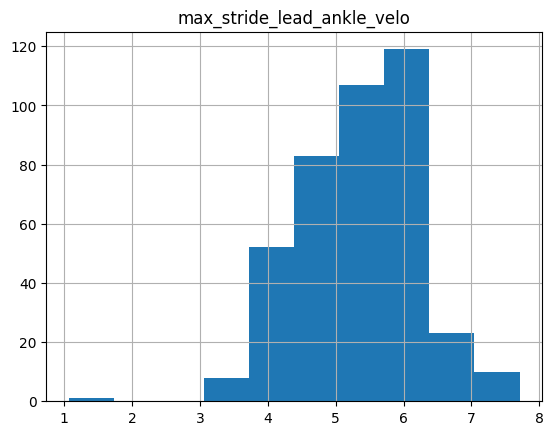

In [400]:
max_lead_ankle_velo.hist()

In [401]:
poi_train_new = poi_train_new.merge(max_lead_ankle_velo, on='session_pitch', how='left')

In [402]:
poi_val_new = poi_val_new.merge(max_lead_ankle_velo, on='session_pitch', how='left')

In [403]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


In [404]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        pitch_speed_mph   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     32.51
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           3.14e-75
Time:                        20:41:32   Log-Likelihood:                -462.76
No. Observations:                 257   AIC:                             1048.
Df Residuals:                     196   BIC:                             1264.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                   -2.316e-07   5.98e-08     -3.874      0.000   -3.49e-07   -1.14e-07
max_shoulder_internal_rotational_velo                                          0.0002   2.42e-05      7.473      0.000       0.000       0.000
max_elbow_extension_velo                                                       0.0001    9.8e-06     12.022      0.000    9.85e-05       0.000
max_torso_rotational_velo                                                   5.199e-05    4.4e-06     11.822      0.000    4.33e-05    6.07e-05
max_rotation_hip_shoulder_separation                                        2.424e-06   4.67e-07      5.196      0.000     1.5e-06    3.34e-06
max_elbow_flexion                                                           4.895e-06   9.65e-07      5.072      0.000    2.99e-06     6.8e-06
max_shoulder_external_rotation                                              1.059e-05   7.06e-07     15.010      0.000     9.2e-06     1.2e-05
elbow_flexion_fp                                                            6.319e-06   1.23e-06      5.149      0.000     3.9e-06    8.74e-06
elbow_pronation_fp                                                          1.975e-06   3.17e-06      0.623      0.534   -4.28e-06    8.23e-06
rotation_hip_shoulder_separation_fp                                         2.645e-06   4.52e-07      5.850      0.000    1.75e-06    3.54e-06
shoulder_horizontal_abduction_fp                                            2.774e-06   1.03e-06      2.700      0.008    7.48e-07     4.8e-06
shoulder_abduction_fp                                                       4.019e-06   1.02e-06      3.951      0.000    2.01e-06    6.03e-06
shoulder_external_rotation_fp                                               3.749e-06   1.42e-06      2.633      0.009    9.41e-07    6.56e-06
lead_knee_extension_angular_velo_fp                                         4.669e-06   1.16e-05      0.403      0.687   -1.82e-05    2.75e-05
lead_knee_extension_angular_velo_br                                         2.572e-05   5.46e-06      4.709      0.000     1.5e-05    3.65e-05
lead_knee_extension_angular_velo_max                                        2.309e-05   4.86e-06      4.750      0.000    1.35e-05    3.27e-05
torso_anterior_tilt_fp                                                      -4.85e-06   1.39e-06     -3.496      0.001   -7.59e-06   -2.11e-06
torso_lateral_tilt_fp                                                      -8.913e-07   8.56e-07     -1.042      0.299   -2.58e-06    7.96e-07
torso_rotation_fp                                                            5.4

That helped a little bit. The new feature is almost significant, has the sign of effect we would expect but not much of an effect.

In [405]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
114,thorax_distal_transfer_fp_br_elbow_transfer_fp_br,0.413408
64,thorax_distal_transfer_fp_br,0.115418
48,elbow_transfer_fp_br,0.047957
131,session_mass_kg_rear_grf_z_max,0.038113
112,thorax_distal_transfer_fp_br_shoulder_internal...,0.031127
...,...,...
80,playing_level,0.000000
180,arm_slot_2,0.000000
178,stride_length_2,0.000000
177,cog_velo_pkh_2,0.000000


In [406]:
importance_df.head(10)

,Feature,Importance
114,thorax_distal_transfer_fp_br_elbow_transfer_fp_br,0.413408
64,thorax_distal_transfer_fp_br,0.115418
48,elbow_transfer_fp_br,0.047957
131,session_mass_kg_rear_grf_z_max,0.038113
112,thorax_distal_transfer_fp_br_shoulder_internal...,0.031127
22,max_cog_velo_x,0.026251
105,lead_hip_transfer_fp_br_lead_knee_extension_fr...,0.022870
44,max_shoulder_horizontal_abduction,0.022266
137,FP_to_BR_time_FS_to_BR_time,0.018973
98,lead_knee_extension_from_fp_to_br_lead_knee_ex...,0.017382


In [407]:
importance_df.tail(10)

,Feature,Importance
187,elbow_generation_fp_br_2,0.0
186,elbow_transfer_fp_br_2,0.0
184,shoulder_generation_fp_br_2,0.0
183,shoulder_transfer_fp_br_2,0.0
182,max_shoulder_horizontal_abduction_2,0.0
80,playing_level,0.0
180,arm_slot_2,0.0
178,stride_length_2,0.0
177,cog_velo_pkh_2,0.0
185,shoulder_absorption_fp_br_2,0.0


Kind of suspected that much of the unimportant features would be the squared ones. Makes sense since we didn't put any thought into the individual squared features. Curious to see how many features we can take out without a drop in performance. 

In [408]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

In [409]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


In [410]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
184,lead_knee_absorption_fp_br_2,0.0
183,lead_knee_generation_fp_br_2,0.0
182,lead_knee_transfer_fp_br_2,0.0
181,lead_hip_absorption_fp_br_2,0.0
180,lead_hip_generation_fp_br_2,0.0
179,lead_hip_transfer_fp_br_2,0.0
178,elbow_absorption_fp_br_2,0.0
174,torso_rotation_br_2,0.0
172,torso_anterior_tilt_br_2,0.0
192,thorax_distal_transfer_fp_br_2,0.0


In [411]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


In [412]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
181,rear_knee_absorption_pkh_fp_2,0.0
180,rear_knee_generation_pkh_fp_2,0.0
179,rear_knee_transfer_pkh_fp_2,0.0
178,rear_hip_absorption_pkh_fp_2,0.0
177,rear_hip_generation_pkh_fp_2,0.0
176,rear_hip_transfer_pkh_fp_2,0.0
123,lead_grf_mag_max_lead_grf_x_max,0.0
171,shoulder_internal_rotation_moment_2,0.0
170,elbow_varus_moment_2,0.0
184,rear_grf_y_max_2,0.0


In [413]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


In [414]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
173,pelvis_lumbar_transfer_fp_br_2,0.0
181,lead_grf_mag_max_2,0.0
180,lead_grf_z_max_2,0.0
179,lead_grf_y_max_2,0.0
178,lead_grf_x_max_2,0.0
136,p_throws_2,0.0
176,rear_grf_mag_max_2,0.0
175,rear_grf_z_max_2,0.0
174,rear_grf_x_max_2,0.0
177,rear_grf_angle_at_max_2,0.0


In [415]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


In [416]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(20)

,Feature,Importance
159,max_pelvis_rotational_velo_2,0.0
160,glove_shoulder_horizontal_abduction_fp_2,0.0
176,session_height_m_2,0.0
185,shoulder_internal_rotation_moment_elbow_varus_...,0.0
184,torso_rotation_mer_torso_anterior_tilt_mer_2,0.0
182,lead_knee_extension_angular_velo_max_lead_knee...,0.0
181,rotation_hip_shoulder_separation_fp_max_rotati...,0.0
180,elbow_flexion_fp_max_elbow_flexion_2,0.0
179,max_lead_knee_jc_z_2,0.0
177,age_yrs_2,0.0


In [417]:
for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


In [418]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(20)

,Feature,Importance
142,elbow_flexion_fp_2,0.0
144,rotation_hip_shoulder_separation_fp_2,0.0
145,shoulder_horizontal_abduction_fp_2,0.0
146,shoulder_abduction_fp_2,0.0
147,shoulder_external_rotation_fp_2,0.0
150,lead_knee_extension_angular_velo_max_2,0.0
177,elbow_absorption_fp_br_elbow_transfer_fp_br_2,0.0
127,session_mass_kg_thorax_distal_transfer_fp_br,0.0
156,pelvis_rotation_fp_2,0.0
157,max_cog_velo_x_2,0.0


In [419]:
for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


In [420]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


In [421]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8747291030501646
RMSE: 1.6259739032408913


First drop in performance

In [422]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8744609025597109
RMSE: 1.627713548468977


Let's stop here for now. That was 140 features dropped with basically no change in performance

In [423]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
111,lead_grf_mag_max_shoulder_internal_rotation_mo...,1.474993e-05
68,lead_grf_mag_max,9.916957e-06
123,torso_lateral_tilt_br_2,8.220558e-06
128,max_stride_lead_ankle_velo,5.326420e-06
70,peak_rfd_rear,5.302713e-06
119,torso_anterior_tilt_fp_2,2.997764e-06
115,session_mass_kg_elbow_transfer_fp_br,9.023610e-07
98,lead_knee_transfer_fp_br_lead_hip_transfer_fp_br,4.685681e-07
17,torso_lateral_tilt_fp,1.762622e-07
125,timing_peak_torso_to_peak_pelvis_rot_velo_2,6.331659e-08


In [424]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.874897090575156
RMSE: 1.6248833268552234


Drop, double check the numbers above

In [425]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
187,elbow_generation_fp_br_2,0.0
186,elbow_transfer_fp_br_2,0.0
184,shoulder_generation_fp_br_2,0.0
183,shoulder_transfer_fp_br_2,0.0
182,max_shoulder_horizontal_abduction_2,0.0
80,playing_level,0.0
180,arm_slot_2,0.0
178,stride_length_2,0.0
177,cog_velo_pkh_2,0.0
185,shoulder_absorption_fp_br_2,0.0


In [ ]:
for feature in importance_df.tail(140).Feature:
    poi_train_new.drop(columns = feature, axis=1, inplace=True)
    poi_val_new.drop(columns = feature, axis=1, inplace=True)

In [427]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8744067351603524
RMSE: 1.6280646721544099


In [431]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [432]:
importance_df[importance_df.Feature.str.contains('time')]

,Feature,Importance
118,FP_to_BR_time_FS_to_BR_time,0.014876
76,peak_knee_to_FS_time,0.002880
78,FS_to_BR_time,0.001122
80,total_time,0.001101
79,FP_to_BR_time,0.001042
77,peak_knee_to_FP_time,0.000845
117,peak_knee_to_FS_time_cog_velo_pkh,0.000172


In [435]:
importance_df.head(50)

,Feature,Importance
105,thorax_distal_transfer_fp_br_elbow_transfer_fp_br,0.510177
61,thorax_distal_transfer_fp_br,0.099710
46,elbow_transfer_fp_br,0.040616
97,lead_hip_transfer_fp_br_lead_knee_extension_fr...,0.021976
103,thorax_distal_transfer_fp_br_shoulder_internal...,0.020925
42,max_shoulder_horizontal_abduction,0.020252
59,rear_knee_absorption_pkh_fp,0.019493
85,shoulder_internal_rotation_moment_elbow_varus_...,0.019447
118,FP_to_BR_time_FS_to_BR_time,0.014876
67,lead_grf_z_max,0.014281


Just making some notes here. Only square feature here is stride angle, but this actually makes intuitive sense. Can see too little or too much being a factor. FS seems more important than FP, maybe if we took FP out, it wouldn't hurt that much since these are similar metrics and FS importance would go up. Only thing I'm weirded out by is that interaction term sitting at 9th most important.

In [436]:
for col in x_train.columns:
    if 'FP' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)

In [437]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8300780629533173
RMSE: 1.893708822643563


Yikes, maybe not. That's worse than our original model. Could the interaction term be a quasi-square term. What if we removed the FP features and added a square of FS_to_BR_time

In [441]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

for col in x_train.columns:
    if 'FP' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)

x_train['FS_to_BR_time_2'] = x_train.FS_to_BR_time**2
x_val['FS_to_BR_time_2'] = x_val.FS_to_BR_time**2



In [442]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8300780629533173
RMSE: 1.893708822643563


Nope. Let's just revert back. Maybe there are separate effects being captured.

In [444]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor()
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8744067351603524
RMSE: 1.6280646721544099


Making a note here, but at the end, we may consider PCA. Only issue is the lack of interpretability for player development purposes. We can see how much it improves performance. Testin out where we are at the moment. Will do a proper grid search later.

In [553]:
linear_model = xgb.XGBRegressor(max_depth = 14, reg_lambda = 1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8856569907441436
RMSE: 1.5534357167005497


In [551]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
105,thorax_distal_transfer_fp_br_elbow_transfer_fp_br,3.712549e-01
61,thorax_distal_transfer_fp_br,1.572688e-01
118,FP_to_BR_time_FS_to_BR_time,5.267349e-02
90,lead_knee_extension_from_fp_to_br_lead_knee_ex...,3.671965e-02
42,max_shoulder_horizontal_abduction,3.355427e-02
...,...,...
122,torso_anterior_tilt_mer_2,1.094007e-07
101,rear_knee_generation_pkh_fp_rear_hip_transfer_...,2.525531e-08
107,lead_grf_y_max_stride_angle,2.715580e-09
123,torso_lateral_tilt_br_2,0.000000e+00


In [554]:
importance_df[importance_df.Feature.str.contains('velo')]

,Feature,Importance
90,lead_knee_extension_from_fp_to_br_lead_knee_ex...,3.671965e-02
22,max_cog_velo_x,2.046988e-02
1,max_shoulder_internal_rotational_velo,3.583301e-03
24,max_pelvis_rotational_velo,3.379998e-03
126,lead_knee_extension_from_fp_to_br_lead_knee_ex...,2.204235e-03
3,max_torso_rotational_velo,7.299718e-04
2,max_elbow_extension_velo,5.410672e-04
128,max_stride_lead_ankle_velo,4.086838e-04
37,cog_velo_pkh,2.770502e-04
91,stride_length_max_cog_velo_x,2.371970e-04


In [555]:
importance_df[importance_df.Feature.str.contains('max')]

,Feature,Importance
90,lead_knee_extension_from_fp_to_br_lead_knee_ex...,3.671965e-02
42,max_shoulder_horizontal_abduction,3.355427e-02
22,max_cog_velo_x,2.046988e-02
67,lead_grf_z_max,1.536341e-02
64,rear_grf_angle_at_max,1.433443e-02
75,max_lead_knee_jc_z,1.427992e-02
106,rear_grf_z_max_rear_grf_x_max,1.160143e-02
116,session_mass_kg_rear_grf_z_max,7.604362e-03
63,rear_grf_z_max,4.642095e-03
68,lead_grf_mag_max,4.152107e-03


In [575]:
# cog vs back foot x location at pkh and squared term, inter term between this and cog_velo_pkh
peak_leg_lift_time = peak_leg_lift_time.merge(landmarks, left_on=['session_pitch', 'peak_knee_time'], right_on=['session_pitch', 'time'], how='left')
peak_leg_lift_time

,session_pitch,max_lead_knee_jc_z,peak_knee_time,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
0,1031_2,1.1610,0.6250,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,...,1.5648,0.2251,-0.2640,1.1838,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778
1,1031_3,1.1455,0.0917,0.0917,0.0852,-0.1224,0.0582,0.1449,-0.0365,0.9222,...,1.5666,0.2099,-0.1847,1.1787,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611
2,1097_1,1.2528,0.1056,0.1056,0.0670,-0.0772,0.0572,0.1427,-0.0310,0.9547,...,1.5881,0.1702,-0.1675,1.2154,0.1056,0.7722,0.8278,0.9722,1.0028,1.0500
3,1097_2,1.3346,0.1722,0.1722,0.0687,-0.0722,0.0566,0.1128,-0.0512,0.9804,...,1.5998,0.1542,-0.1690,1.2428,0.1722,0.8528,0.8917,1.0306,1.0611,1.1083
4,1097_3,1.3434,0.1472,0.1472,0.0754,-0.0802,0.0574,0.1415,-0.0538,0.9762,...,1.5990,0.1653,-0.1679,1.2435,0.1472,0.8361,0.8472,1.0028,1.0306,1.0778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,1.1282,1.1250,1.1250,0.0894,-0.2624,0.0758,0.1335,-0.2528,0.9503,...,1.5268,0.1491,-0.3333,1.1662,1.1250,1.7556,1.7722,1.8861,1.9167,1.9500
407,3252_2,1.1912,0.8583,0.8583,0.0900,-0.2708,0.0770,0.1176,-0.2694,0.9507,...,1.5211,0.1437,-0.3413,1.1705,0.8583,1.5111,1.5250,1.6444,1.6722,1.7083
408,3252_3,1.1596,0.8944,0.8944,0.0842,-0.2321,0.0772,0.1442,-0.2016,0.9452,...,1.5131,0.1626,-0.2840,1.1615,0.8944,1.5306,1.5444,1.6583,1.6889,1.7250
409,3252_4,1.1912,0.6250,0.6250,0.0864,-0.2446,0.0764,0.1272,-0.2310,0.9554,...,1.5247,0.1523,-0.3079,1.1716,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778


In [576]:
peak_leg_lift_time['cog_back_foot_diff_pkh'] = peak_leg_lift_time.centerofmass_x - peak_leg_lift_time.rear_ankle_jc_x

In [577]:
joint_angles.rear_knee_angle_x

0         27.8440
1         28.0164
2         28.1834
3         28.3388
4         28.4780
           ...   
247704    65.7704
247705    65.8856
247706    65.9629
247707    66.0106
247708    66.0372
Name: rear_knee_angle_x, Length: 247709, dtype: float64

In [578]:
peak_leg_lift_time = peak_leg_lift_time.merge(joint_angles[['session_pitch', 'time', 'rear_knee_angle_x']], on=['session_pitch', 'time'], how='left')

In [580]:
peak_leg_lift_time.rename(columns={'rear_knee_angle_x': 'rear_knee_angle_pkh'}, inplace=True)

In [581]:
cog_and_knee = peak_leg_lift_time[['session_pitch', 'cog_back_foot_diff_pkh', 'rear_knee_angle_pkh']]
poi_train_new = poi_train_new.merge(cog_and_knee, on='session_pitch', how='left')
poi_val_new = poi_val_new.merge(cog_and_knee, on='session_pitch', how='left')

In [585]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 14, reg_lambda = 1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8793529041917556
RMSE: 1.5956840848837457


In [588]:
poi_train_new['cog_back_foot_diff_pkh_2'] = poi_train_new.cog_back_foot_diff_pkh**2
poi_train_new['cog_back_foot_diff_pkh_cog_velo_pkh'] = poi_train_new.cog_back_foot_diff_pkh*poi_train_new.cog_velo_pkh
poi_train_new['rear_knee_angle_pkh_2'] = poi_train_new.rear_knee_angle_pkh**2

poi_val_new['cog_back_foot_diff_pkh_2'] = poi_val_new.cog_back_foot_diff_pkh**2
poi_val_new['cog_back_foot_diff_pkh_cog_velo_pkh'] = poi_val_new.cog_back_foot_diff_pkh*poi_val_new.cog_velo_pkh
poi_val_new['rear_knee_angle_pkh_2'] = poi_val_new.rear_knee_angle_pkh**2

In [589]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 14, reg_lambda = 1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8756289352903788
RMSE: 1.6201236193506432


In [590]:
poi_train_new.drop(columns=['rear_knee_angle_pkh', 'rear_knee_angle_pkh_2'], inplace=True)
poi_val_new.drop(columns=['rear_knee_angle_pkh', 'rear_knee_angle_pkh_2'], inplace=True)

x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 14, reg_lambda = 1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8830632298910839
RMSE: 1.5709560113935908


In [591]:
poi_train_new.drop(columns=['cog_back_foot_diff_pkh'], inplace=True)
poi_val_new.drop(columns=['cog_back_foot_diff_pkh'], inplace=True)

x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 14, reg_lambda = 1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8830632298910839
RMSE: 1.5709560113935908


In [592]:
poi_train_new.drop(columns=['cog_back_foot_diff_pkh_2'], inplace=True)
poi_val_new.drop(columns=['cog_back_foot_diff_pkh_2'], inplace=True)

x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 14, reg_lambda = 1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8784707564440299
RMSE: 1.6015071235558689


In [594]:
poi_train_new.drop(columns=['cog_back_foot_diff_pkh_cog_velo_pkh'], inplace=True)
poi_val_new.drop(columns=['cog_back_foot_diff_pkh_cog_velo_pkh'], inplace=True)

In [595]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 14, reg_lambda = 1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8856569907441436
RMSE: 1.5534357167005497
